<a href="https://colab.research.google.com/github/andybak/BulletSharpUnity3d/blob/master/Deep_Daze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Restart after running this cell!**

You must run this cell and then restart and rerun everything for the PyTorch version to be correct. Otherwise the model will run but not produce any meaningful output.

In [1]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

CUDA version: 10.1
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 26kB/s 
     |████████████████████████████████| 12.8MB 240kB/s 
     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=650406ed45d74cddf1a0d21aacb97d7ad6ea51b29d71775e50699b027d7d719c
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


# New section

In [2]:
!pip install deep-daze --upgrade

     |████████████████████████████████| 1.4MB 5.4MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111006 sha256=8b53e51b3c0ef0d82bb8c8885e0920b4077090f20998ecf9ffbf1ec1d1686ae0
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire


iteration:   0%|          | 0/1000 [00:00<?, ?it/s]

image updated at "./A_burning_building_at_night.png"


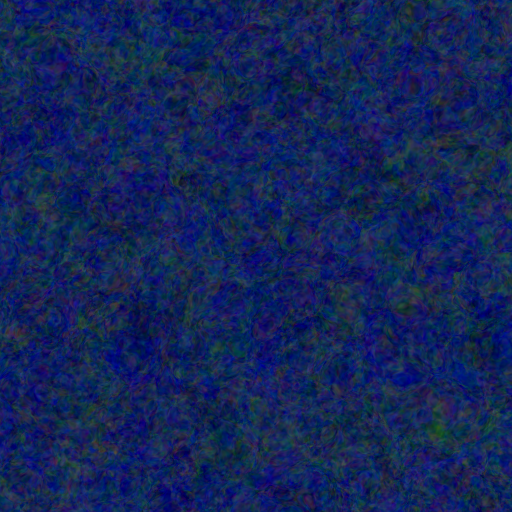


iteration:   2%|▏         | 20/1000 [05:27<4:13:18, 15.51s/it]

image updated at "./A_burning_building_at_night.png"


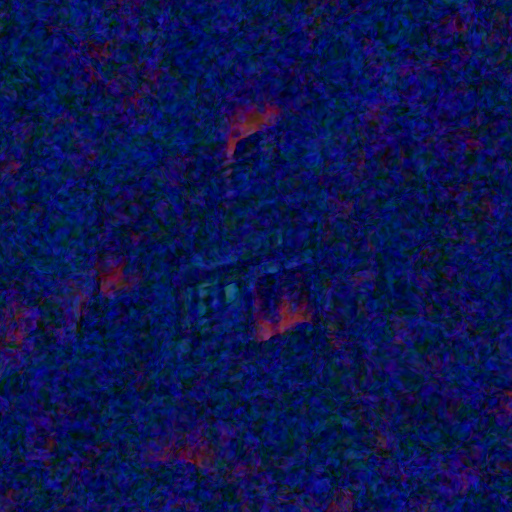


iteration:   4%|▍         | 40/1000 [10:38<4:07:41, 15.48s/it]

image updated at "./A_burning_building_at_night.png"


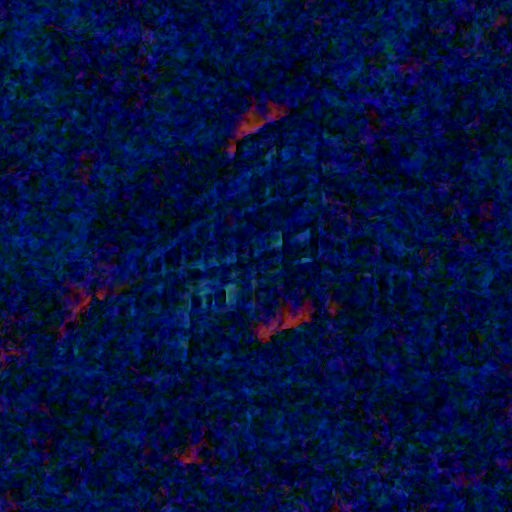


iteration:   6%|▌         | 60/1000 [15:48<4:02:46, 15.50s/it]

image updated at "./A_burning_building_at_night.png"


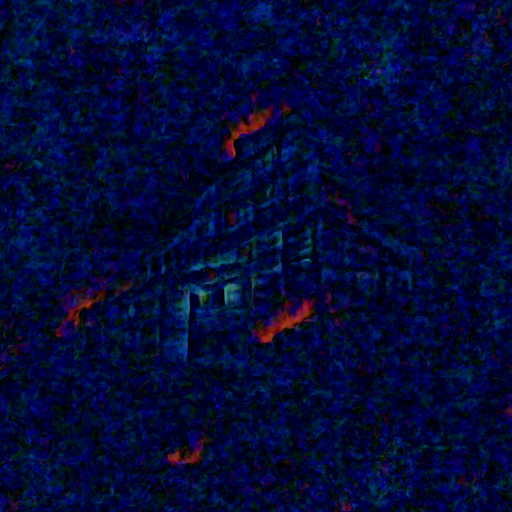


iteration:   8%|▊         | 80/1000 [20:59<3:57:44, 15.51s/it]

image updated at "./A_burning_building_at_night.png"


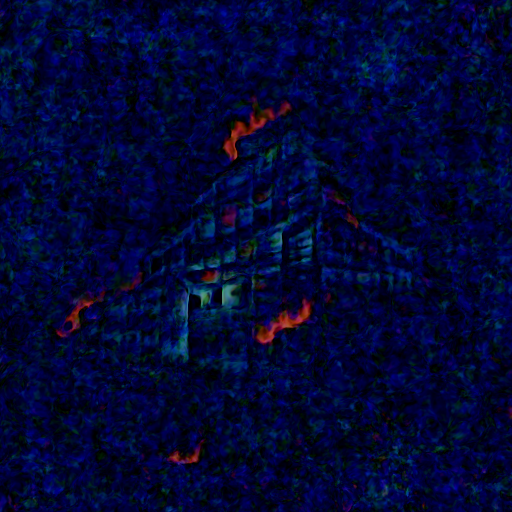


iteration:  10%|█         | 100/1000 [26:10<3:52:36, 15.51s/it]

image updated at "./A_burning_building_at_night.png"


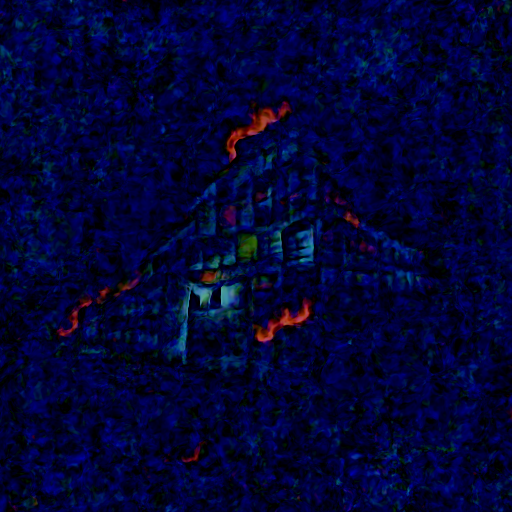


iteration:  12%|█▏        | 120/1000 [31:21<3:47:16, 15.50s/it]

image updated at "./A_burning_building_at_night.png"


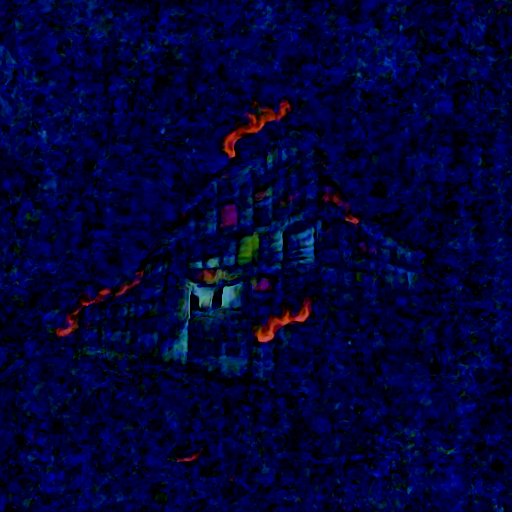


iteration:  14%|█▍        | 140/1000 [36:32<3:41:57, 15.49s/it]

In [ ]:
from tqdm import trange
from IPython.display import Image, display

from deep_daze import Imagine

TEXT = 'A burning building at night' #@param {type:"string"}
NUM_LAYERS = 32 #@param {type:"number"}
SAVE_EVERY =  20#@param {type:"number"}
IMAGE_WIDTH = 512 #@param {type:"number"}
SAVE_PROGRESS = False #@param {type:"boolean"}
LEARNING_RATE = 1e-5 #@param {type:"number"}
ITERATIONS = 1050 #@param {type:"number"}

model = Imagine(
    text = TEXT,
    num_layers = NUM_LAYERS,
    save_every = SAVE_EVERY,
    image_width = IMAGE_WIDTH,
    lr = LEARNING_RATE,
    iterations = ITERATIONS,
    save_progress = SAVE_PROGRESS
)

for epoch in trange(20, desc = 'epochs'):
    for i in trange(1000, desc = 'iteration'):
        model.train_step(epoch, i)

        if i % model.save_every != 0:
            continue

        filename = TEXT.replace(' ', '_')
        image = Image(f'./{filename}.png')
        display(image)